## 영상정보처리 7주차 과제 템플리트
- 점수: 10점 만점
- 이미지 경로 잘못 사용한 경우: -3
- 문제1: 10점 

이름: 박민혁            
학번: 32151671


# 구글 드라이브 마우팅 및 작업 경로로 이동
- 다음 쉘에 필요한 작업을 하시오. 

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


다음의 경로는 변경하지 말것

In [6]:
%cd /gdrive/MyDrive/Classroom/[영상정보처리] 2000004793-2021-1/Report Week 7
%ls ../
image_path = '../Dongkeun-OpenCV-ImgData/lena.jpg' 

/gdrive/MyDrive/Classroom/[영상정보처리] 2000004793-2021-1/Report Week 7
'시험 공부'/               'Report Week 2'/  'Report Week 4'/  'Report Week 6'/
 Dongkeun-OpenCV-ImgData/  'Report Week 3'/  'Report Week 5'/  'Report Week 7'/


##문제 1:


1. 주어진 영상을 grayscale 로 읽어 들인다 (org_img)
2. 입력 영상과 같은 크기의 빈 컬러 이미지를 만든다 (new_image)
3. 소스코드 color_map_custom_key_colors.py를 참조하여, 자신이 원하는대로 컬러맵을 5개의 값을 이용해 만든다.  
4. 소스코드 color_map_custom_legend.py를 참조하여, Legend를 만든 후 "Legend"라는 타이틀을 부여한 후 출력한다. 
5. 만들어진 컬러맵을 LUT(), applyColorMap()을 이용해 컬러맵을 주어진 영상에 적용해서 두 개의 이미지의 타이틀을 각각 "LUT() Application", "applyColorMap() Application" 로 한 다음 출력한다. 





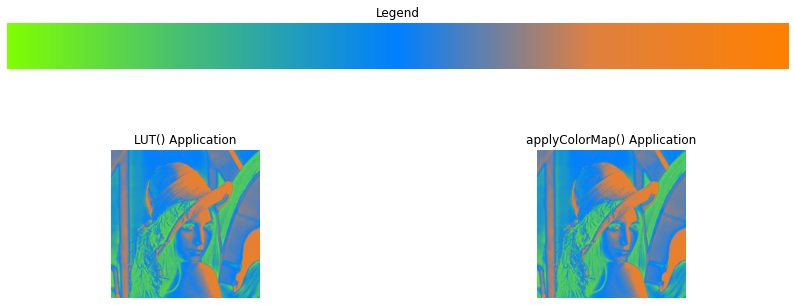

In [48]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# function for legend bar image
def build_lut_image(cmap, height):

    lut = build_lut(cmap)
    image = np.repeat(lut[np.newaxis, ...], height, axis=0)

    return image

# function for lookup table
def build_lut(cmap):

    lut = np.empty(shape=(256, 3), dtype=np.uint8)
    max = 256
    lastval, lastcol = cmap[0]

    for step, col in cmap[1:]:
        val = int(step * max)
        for i in range(3):
            lut[lastval:val, i] = np.linspace(lastcol[i], col[i], val - lastval)

        lastcol = col
        lastval = val

    return lut

# function for custom color map using LUT()
def lut_function(gray, cmap):

    lut = build_lut(cmap)
    s0, s1 = gray.shape
    out = np.empty(shape=(s0, s1, 3), dtype=np.uint8)

    for i in range(3):
        out[..., i] = cv2.LUT(gray, lut[:, i])
    return out

# function for custom color map using applyColorMap()
def apply_function(gray, cmap):

    lut = build_lut(cmap)
    lut2 = np.reshape(lut, (256, 1, 3))
    im_color = cv2.applyColorMap(gray, lut2)
    return im_color

# function for Shows an image using matplotlib capabilities
def show_with_matplotlib(color_img, title, pos):

    b, g, r = cv2.split(color_img)
    color_img = cv2.merge((r, g, b))

    if pos == 1:
      ax = plt.subplot(2, 1, pos)
    else:
      ax = plt.subplot(2, 2, pos)
    plt.imshow(color_img)
    plt.title(title)
    plt.axis('off')


org_img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
new_img = np.zeros(org_img.shape, dtype = np.uint8)

color_map = (
    (0, (0, 255, 128
         )),
     (0.25, (128, 184, 64)),
     (0.5, (255, 128, 0)),
     (0.75, (64, 128, 224)),
     (1.0, (0, 128, 255))
)

plt.figure(figsize=(14, 6))

lut = lut_function(org_img, color_map)
apply = apply_function(org_img, color_map)
legend_bar = build_lut_image(color_map, 15)

show_with_matplotlib(legend_bar, "Legend", 1)
show_with_matplotlib(lut, "LUT() Application", 3)
show_with_matplotlib(apply, "applyColorMap() Application", 4)

plt.show()